In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-defaulter/application_data.csv
/kaggle/input/loan-defaulter/previous_application.csv
/kaggle/input/loan-defaulter/columns_description.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.max_columns = None

pd.set_option('display.max_colwidth', None)

## 1. Data Preprocessing

In [4]:
app = pd.read_csv("/kaggle/input/loan-defaulter/application_data.csv")
prev_app = pd.read_csv("/kaggle/input/loan-defaulter/previous_application.csv")

In [5]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 2. Feature Selection

In [6]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
app.shape

(307511, 122)

In [8]:
msng_info = pd.DataFrame((app.isnull().sum().sort_values())/app.shape[0]*100).reset_index()
msng_info.rename(columns={"index": "col_name", 0: "missing_%"}, inplace=True)
msng_info

,col_name,missing_%
0,SK_ID_CURR,0.000000
1,HOUR_APPR_PROCESS_START,0.000000
2,REG_REGION_NOT_WORK_REGION,0.000000
3,LIVE_REGION_NOT_WORK_REGION,0.000000
4,REG_CITY_NOT_LIVE_CITY,0.000000
...,...,...
117,NONLIVINGAPARTMENTS_MEDI,69.432963
118,NONLIVINGAPARTMENTS_MODE,69.432963
119,COMMONAREA_MODE,69.872297
120,COMMONAREA_AVG,69.872297


Dropping all columns with missing value > 40%

In [9]:
drop_cols = msng_info[msng_info['missing_%'] > 40].col_name
app.drop(columns=drop_cols, axis=1, inplace=True)

### 2.1 Flag columns

Examining the dataframe, we see a number of 'FLAG_' columns. We will go ahead and find out their significance wrt to the target column

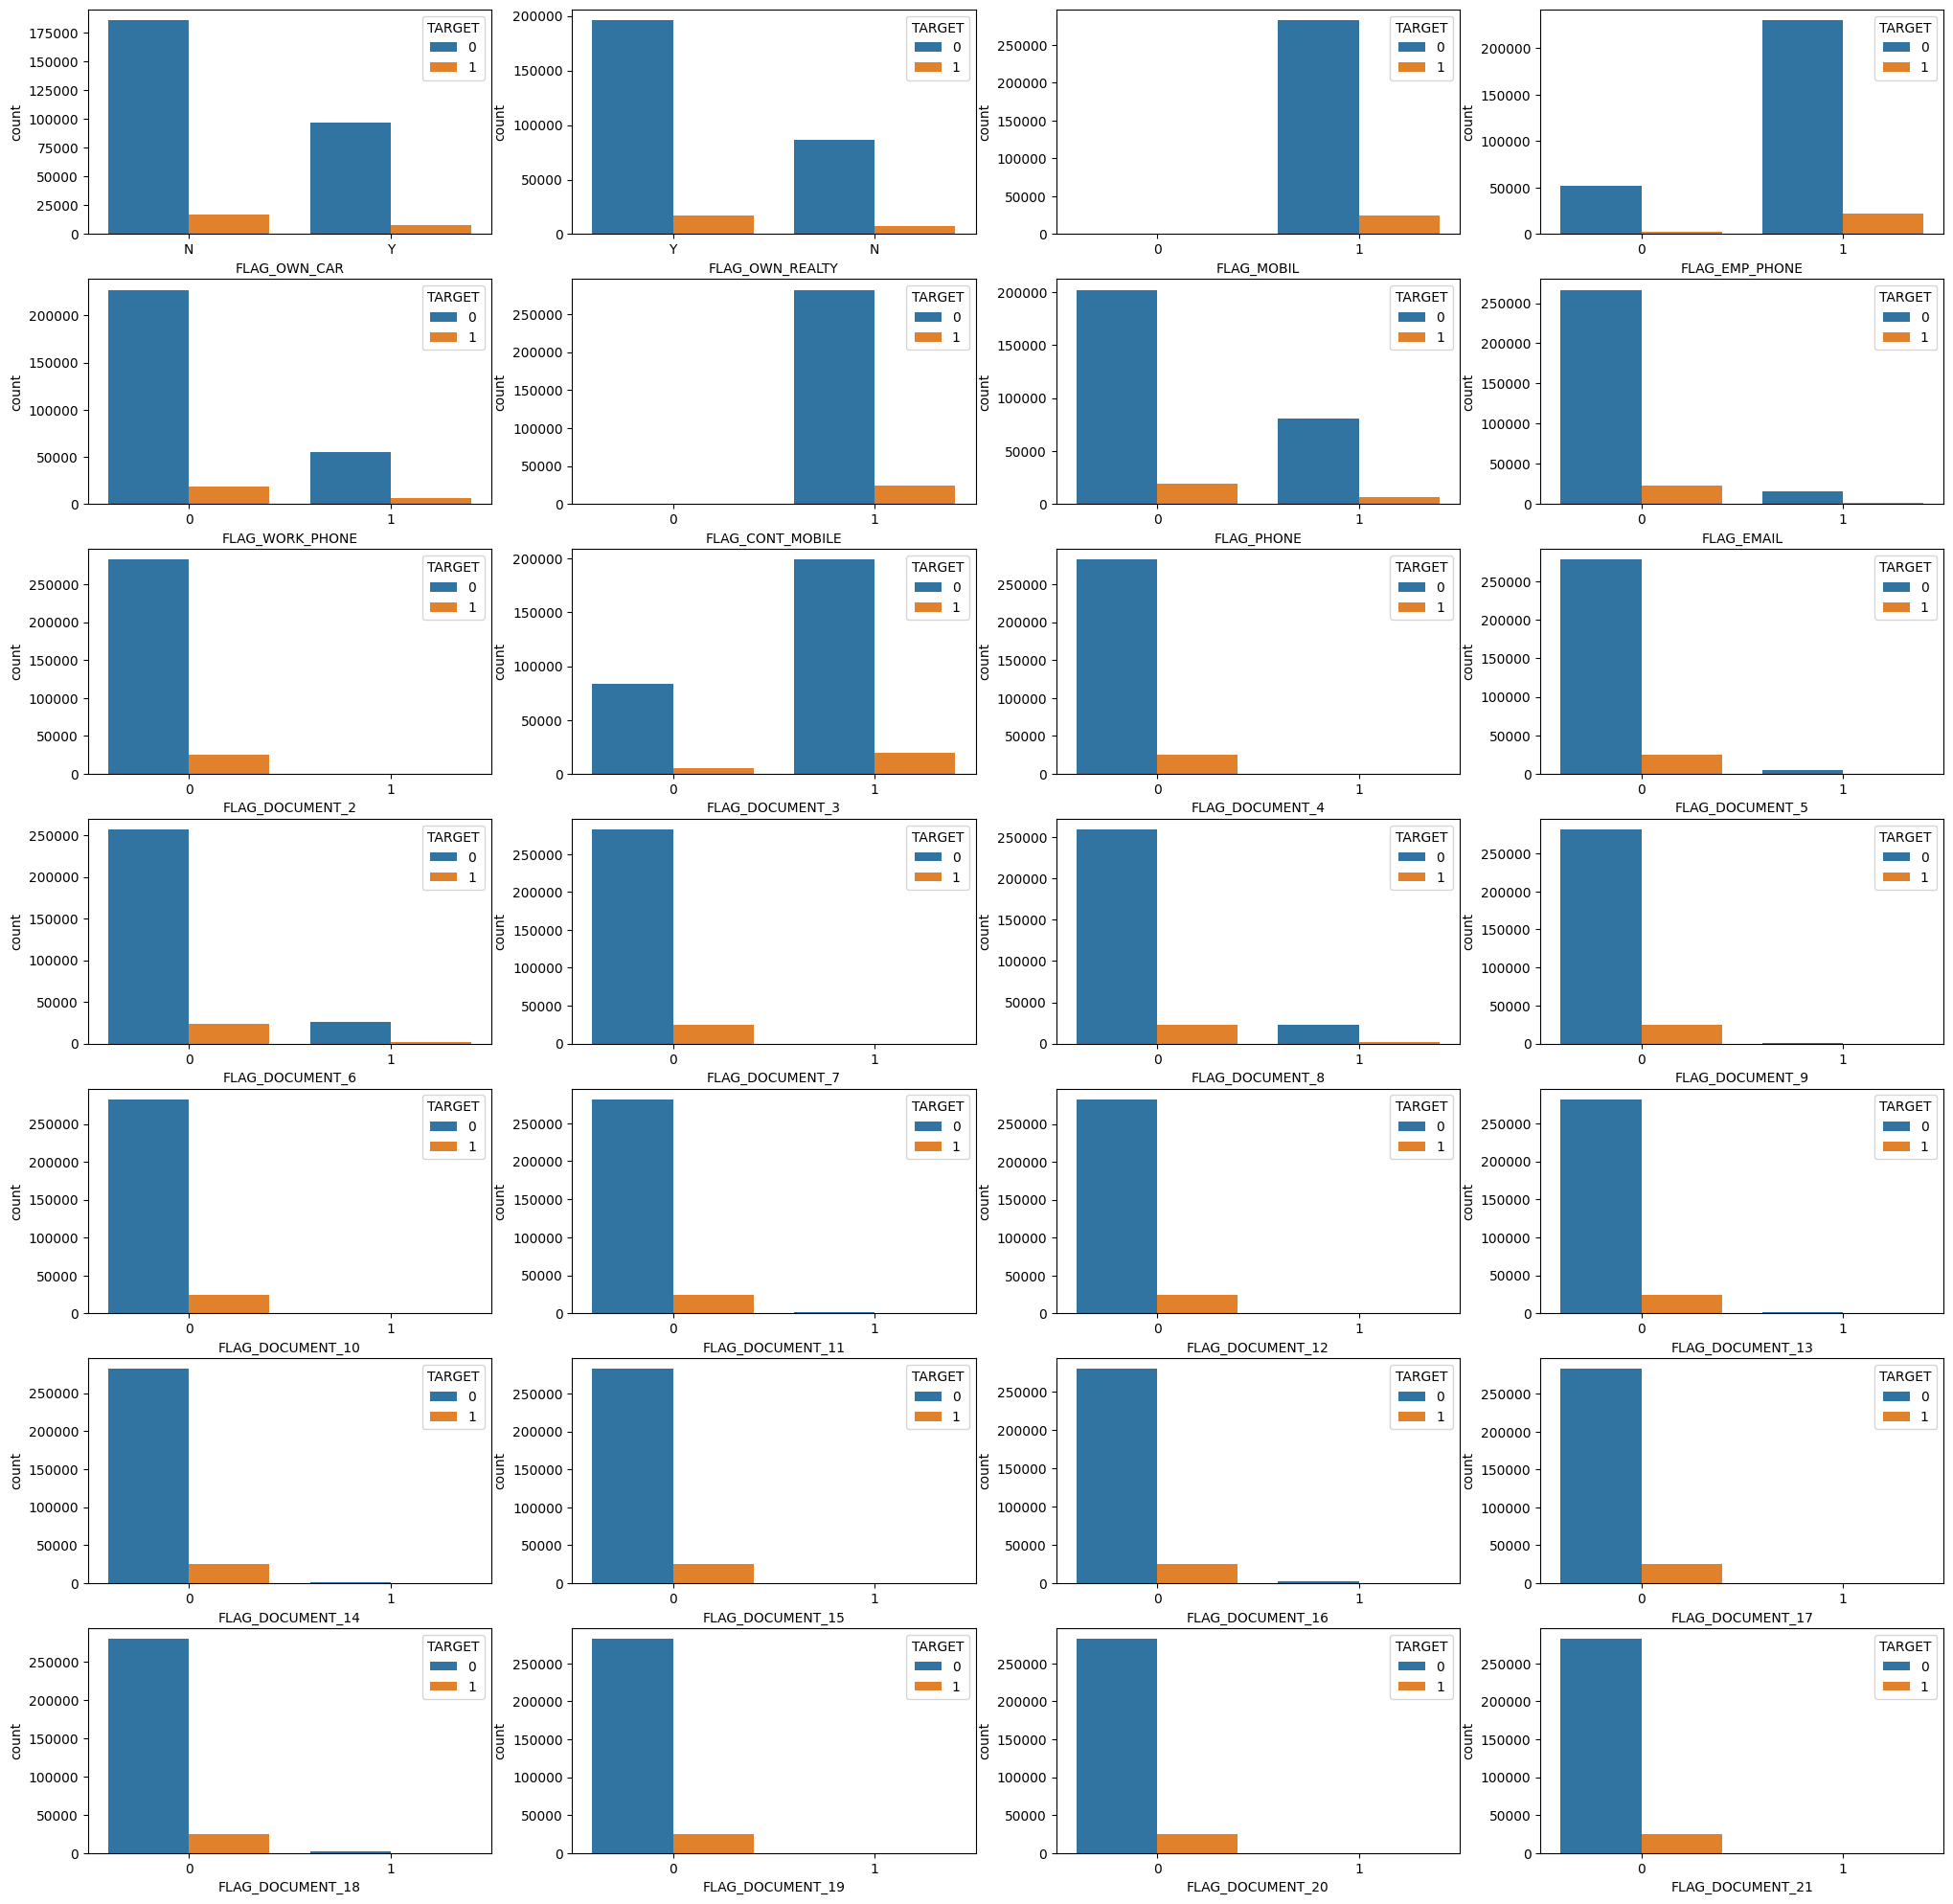

In [10]:
flag_cols = [col for col in app.columns if col.startswith("FLAG_")]

# Plotting flag_cols v/s target
plt.figure(figsize=(25,25))

for i, col in enumerate(flag_cols):
    plt.subplot(7, 4, i+1)
    sns.countplot(data=app, x=col, hue='TARGET')

- Except for `FLAG_DOCUMENT_3` in almost all the other cases people rarely submit documents

- FLAG_DOCUMENTS columns don't provide us much information about defaulters and non-defaulters

/tmp/ipykernel_24/421279526.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flag_corr_df.loc[:, 'FLAG_OWN_CAR'] = flag_corr_df.FLAG_OWN_CAR.replace({'N': 0, 'Y': 1})
/tmp/ipykernel_24/421279526.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flag_corr_df.loc[:, 'FLAG_OWN_REALTY'] = flag_corr_df.FLAG_OWN_REALTY.replace({'N': 0, 'Y': 1})


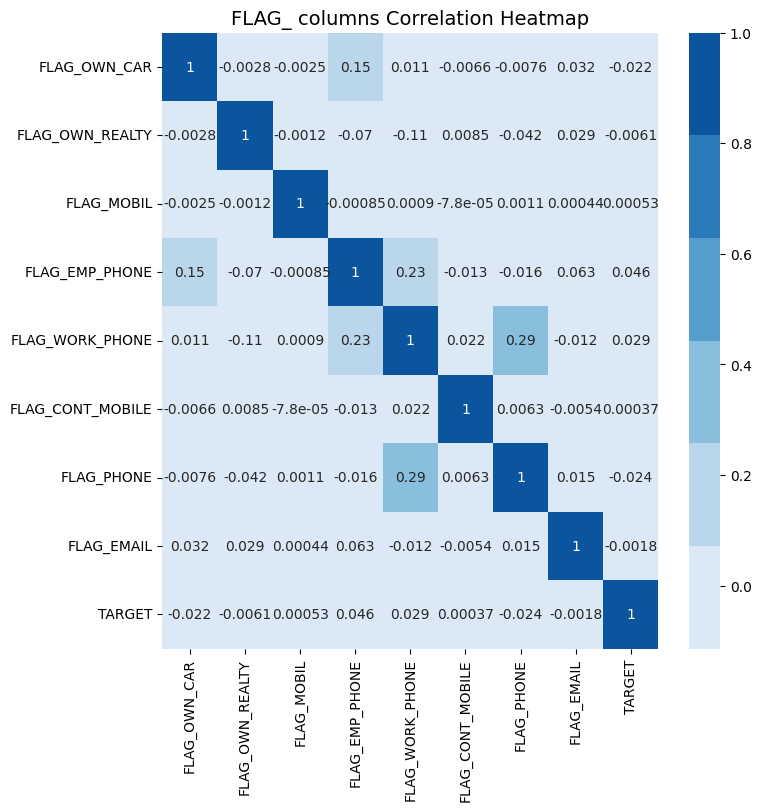

In [11]:
# flag_cols correlation

flag_corr = ['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL']

# label encoding
flag_corr_df = app[flag_corr + ['TARGET']]
flag_corr_df.loc[:, 'FLAG_OWN_CAR'] = flag_corr_df.FLAG_OWN_CAR.replace({'N': 0, 'Y': 1})
flag_corr_df.loc[:, 'FLAG_OWN_REALTY'] = flag_corr_df.FLAG_OWN_REALTY.replace({'N': 0, 'Y': 1})
flag_corr_df.loc[:, 'FLAG_OWN_CAR'] = flag_corr_df['FLAG_OWN_CAR'].astype('int64')
flag_corr_df.loc[:, 'FLAG_OWN_REALTY'] = flag_corr_df['FLAG_OWN_REALTY'].astype('int64')

# plot correlation
plt.figure(figsize=(8,8))
colormap = sns.color_palette("Blues")
sns.heatmap(flag_corr_df.corr(), cmap=colormap, annot=True).set_title('FLAG_ columns Correlation Heatmap', fontsize=14)
plt.show()

Drop these columns because of very low correlation score

In [12]:
app.drop(columns=flag_cols, inplace=True)

In [13]:
app.drop(columns=['EXT_SOURCE_2', 'EXT_SOURCE_3'], inplace=True)

## 3. Feature Engineering

In [14]:
app.isnull().sum().sort_values() / app.shape[0]*100

SK_ID_CURR                      0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_REGISTRATION               0.000000
DAYS_EMPLOYED                   0.000000
DAYS_BIRTH                      0.000000
REGION_RATING_CLIENT            0.000000
NAME_HOUSING_TYPE               0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
REGION_POPULATION_RELATIVE      0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
CODE_GENDER                     0.000000
NAME_INCOME_TYPE

### 3.1 Missing Value Imputation

#### Categorical Columns

- `CNT_FAM_MEMBERS`
- `OCCUPATION_TYPE`
- `NAME_TYPE_SUITE `

In [15]:
# CNT_FAM_MEMBERS column 
mode_val = app.CNT_FAM_MEMBERS.mode()[0]
app.CNT_FAM_MEMBERS = app.CNT_FAM_MEMBERS.fillna(mode_val)

# OCCUPATION_TYPE column
mode_val = app.OCCUPATION_TYPE.mode()[0]
app.OCCUPATION_TYPE = app.OCCUPATION_TYPE.fillna(mode_val)

# NAME_TYPE_SUITE column
mode_val = app.NAME_TYPE_SUITE.mode()[0]
app.NAME_TYPE_SUITE = app.NAME_TYPE_SUITE.fillna(mode_val)
app.NAME_TYPE_SUITE.isnull().sum()

0

#### Numerical Columns

`AMT_ANNUITY`

A look at the KDE plot shows

- Majority of the annuity amounts are concentrated between 0 and 100000 with a peak around 30000

- The right skewness indicates most data points are lower annuity amounts with fewer instances of higher annuity amounts

- After 50000 the density sharply decreases and continues to taper off. This indicates higher loan annuity amounts are less common

From the descriptive stats the mean and median are in similar range. So its okay to impute with either of them. For now we will use the median

In [16]:
app['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


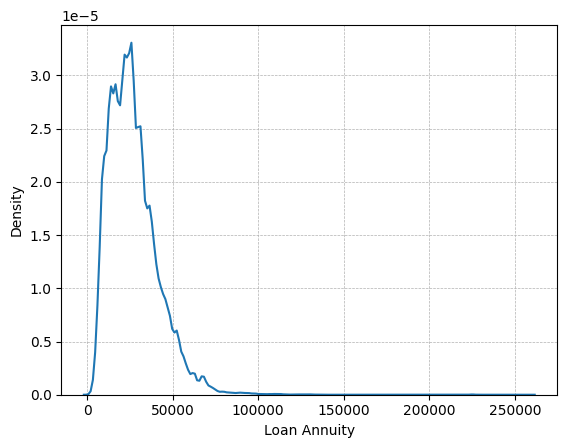

In [17]:
# KDE plot of AMT_ANNUITY column
sns.kdeplot(app['AMT_ANNUITY'])
plt.xlabel("Loan Annuity")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Imputing with median
median_val = app.AMT_ANNUITY.median()
app.AMT_ANNUITY = app.AMT_ANNUITY.fillna(median_val)

`AMT_REQ_CREDIT_BUREAU` Features

These features indicates the number of request made to the credit bureau about the client. The data has be classified into hourly, daily, weekly, monthly, quarterly and yearly basis


In [18]:
# getting the list of cols
credreq_cols = [col for col in app.columns if col.startswith('AMT_REQ_CREDIT')]

# looping and mode imputing
for col in credreq_cols:
    app[col] = app[col].fillna(app[col].mode()[0])

`AMT_GOODS_PRICE`

It shows the asset value of the loan issued. We can see its distribution using a box plot. It is visible that

- Most asset valuations range b/w 250000 to 700000
- Median asset value is around 500000
- The data is right skewed
  - Smaller left whisker indicates that the lower range of asset values in quite small
  - Longer right whisker suggest a higher spread in the upper range due to the presence of outliers
 
Since the distribution is skewed, we can impute it with the median value

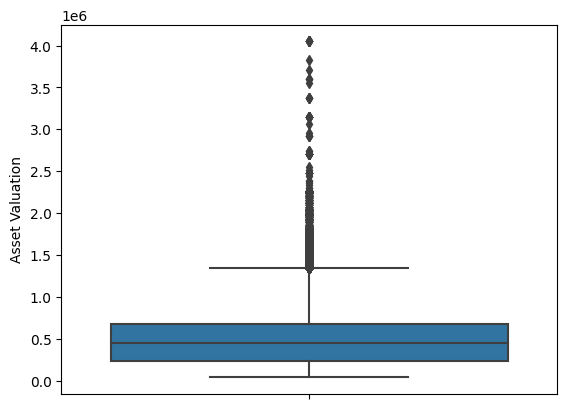

In [19]:
# Box plot
sns.boxplot(y = 'AMT_GOODS_PRICE', data = app)
plt.ylabel('Asset Valuation')
plt.show()


# These fns were used
# app.AMT_GOODS_PRICE.quantile(0.25)
# app.AMT_GOODS_PRICE.describe()

In [20]:
# Median imputing
app['AMT_GOODS_PRICE'] = app['AMT_GOODS_PRICE'].fillna(app.AMT_GOODS_PRICE.median())

### 3.2 Value Modification

In [21]:
# Converting these columns to positive

days_col = [col for col in app.columns if col.startswith("DAYS")]

for col in days_col:
    app[col] = app[col].abs()



In [22]:
app.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION          2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
CODE_GENDER                         3
NAME_EDUCATION_TYPE                 5
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_HOUSING_TYPE                   6
NAME_FAMILY_STATUS                  6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
HOUR_APPR_PR

## 4. EDA

### 4.1 Univariate Analysis on Categorical Variables

#### NAME_CONTRACT_TYPE

- Cash loans constitute about 90% of the total loans. It accounts for 7.5% of the default rate
- Overall default rate is around 8%
- Ratio of cash loans to default rate is 7.7 whereas for revolving loans is 5

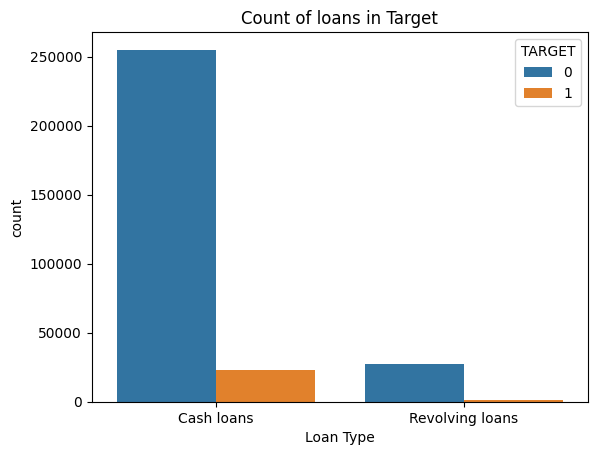

In [23]:
# Loan categories count by target
sns.countplot(x='NAME_CONTRACT_TYPE', data=app, hue='TARGET')
plt.xlabel('Loan Type')
plt.title('Count of loans in Target')
plt.show()

In [24]:
# % default / non-default for loan categories
app.groupby('NAME_CONTRACT_TYPE')['TARGET'].value_counts() / app.shape[0] * 100

NAME_CONTRACT_TYPE  TARGET
Cash loans          0         82.927440
                    1          7.551275
Revolving loans     0          8.999678
                    1          0.521607
Name: count, dtype: float64

#### CODE_GENDER

- 65% of loans are taken by females and they are less likely to default

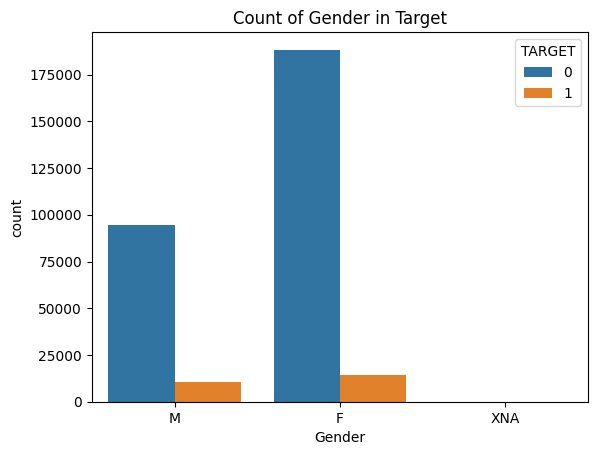

In [25]:
# Loan count among gender 
sns.countplot(x='CODE_GENDER', data=app, hue='TARGET')
plt.xlabel('Gender')
plt.title('Count of Gender in Target')
plt.show()

In [26]:
# % default across gender
app.groupby('CODE_GENDER')['TARGET'].value_counts() / app.shape[0] * 100

CODE_GENDER  TARGET
F            0         61.226428
             1          4.607965
M            0         30.699390
             1          3.464917
XNA          0          0.001301
Name: count, dtype: float64

/tmp/ipykernel_24/1581154752.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_df_tgt_1['Relative_Default_PCT'] = gender_df_tgt_1['count'] / gender_df_tgt_1['total_count'] * 100


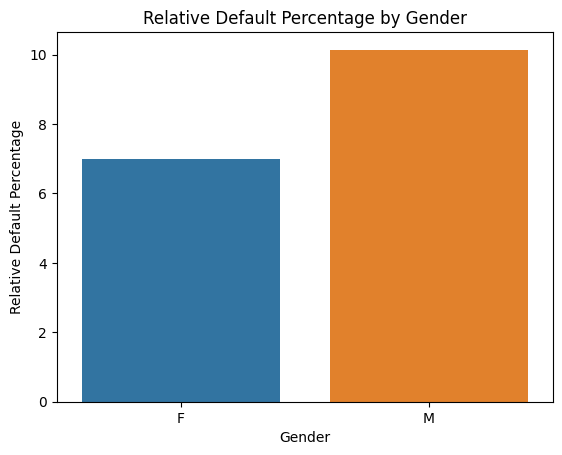

In [27]:
# Relative default percentage across gender
gender_df = app.groupby('CODE_GENDER')['TARGET'].value_counts().reset_index(name='count')
total_count_df = gender_df.groupby('CODE_GENDER')['count'].sum().reset_index(name='total_count')
gender_df = gender_df.merge(total_count_df, on='CODE_GENDER')
gender_df_tgt_1 = gender_df[gender_df['TARGET'] == 1]
gender_df_tgt_1['Relative_Default_PCT'] = gender_df_tgt_1['count'] / gender_df_tgt_1['total_count'] * 100

# Bar plot
sns.barplot(data=gender_df_tgt_1, x='CODE_GENDER', y='Relative_Default_PCT')
plt.title('Relative Default Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Relative Default Percentage')
plt.show()

#### NAME_TYPE_SUITE

- In most cases people came individually to take loans
- Less proportion of people are accompanied by their family. The number decreases even further in other cases
- Considering the relative default,those accompanied by **Other_B** category are more likey to default. Whereas it most safe when children accompany

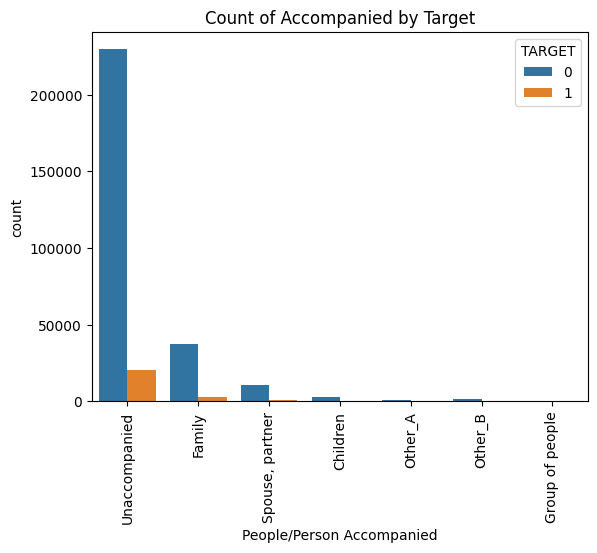

In [28]:
# Type of people (or persons) accompanied 
sns.countplot(x='NAME_TYPE_SUITE', data=app, hue='TARGET')
plt.xlabel('People/Person Accompanied')
plt.title('Count of Accompanied by Target')
plt.xticks(rotation=90)
plt.show()

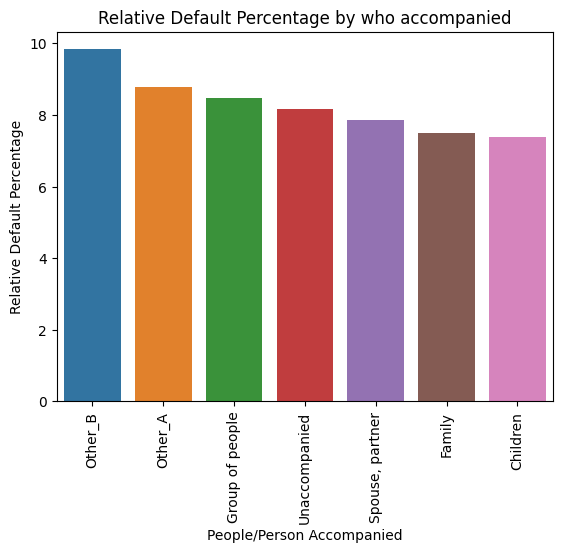

In [29]:
# Relative default percentage

# Group by 'NAME_TYPE_SUITE' and get the counts of 'TARGET'
acmp_df = app.groupby('NAME_TYPE_SUITE')['TARGET'].value_counts().reset_index(name='count')

# Calculate the total count per 'NAME_TYPE_SUITE'
total_counts = acmp_df.groupby('NAME_TYPE_SUITE')['count'].sum().reset_index(name='total_count')

# Merge total_counts with acmp_df
acmp_df = acmp_df.merge(total_counts, on='NAME_TYPE_SUITE')

# Calculate the relative percentage
acmp_df['Relative_Default_PCT'] = (acmp_df['count'] / acmp_df['total_count']) * 100

# Filter rows where TARGET is 1
target_1_df = acmp_df[acmp_df['TARGET'] == 1]

# Sort by 'Relative_Default_PCT' in descending order
sorted_df = target_1_df.sort_values(by='Relative_Default_PCT', ascending=False)

# Barplot
sns.barplot(data=sorted_df, x='NAME_TYPE_SUITE', y='Relative_Default_PCT')
plt.title('Relative Default Percentage by who accompanied')
plt.xlabel("People/Person Accompanied")
plt.ylabel("Relative Default Percentage")
plt.xticks(rotation=90)
plt.show()


#### NAME_INCOME_TYPE

- People in the working are the largest applicants, followed by commercial associates and pensioners
- Commercial associates which rank second is just half the count of working category
- Maternity leave shows highest relative default followed by unemployed and working categories

From the analysis, it is evident that working professionals and commercial associates are the most promising target groups. Their significant representation in the business indicates that targeting them further can be achieved with minimal resource allocation. Additionally, their consistent repayment records reinforce their reliability and make them an attractive group for credit offerings

Looking at categorywise default
- **Mothers on maternity** leave exhibits high default rates, likely due to financial strains such as increased healthcare costs and reduced income during the maternity period. This highlights the necessity for a thorough review of existing corporate and government policies. Addressing the root causes of default through enhanced credit mechanisms or additional social security measures could provide much-needed support to this group.
- Loans extended to **unemployed individuals** warrant more stringent scrutiny. Offering targeted schemes and benefits aimed at upskilling these individuals could empower them to secure employment and repay their debts. This proactive approach not only supports their financial stability but also contributes to overall economic growth

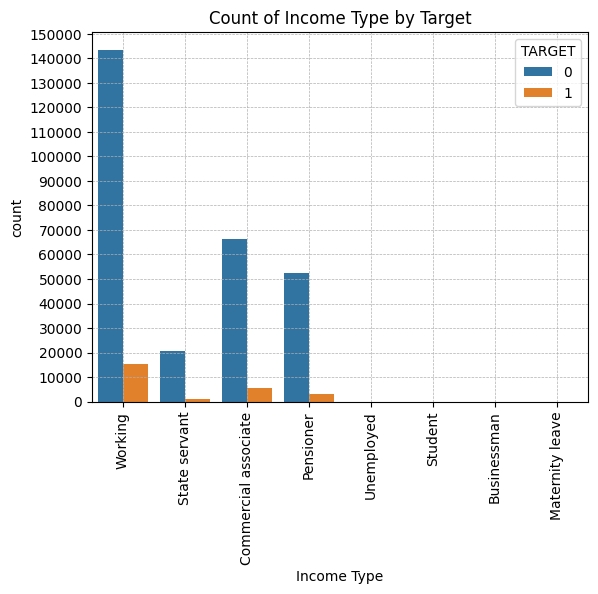

In [30]:
# Count of income type by Target
sns.countplot(data=app, x='NAME_INCOME_TYPE', hue='TARGET')
plt.title('Count of Income Type by Target')
plt.xlabel('Income Type')
plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(np.arange(0, 160000, 10000))
plt.show()

/tmp/ipykernel_24/2446200936.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_df_tgt_1['Relative_Default_PCT'] = income_df_tgt_1['count'] / income_df_tgt_1['total_count']


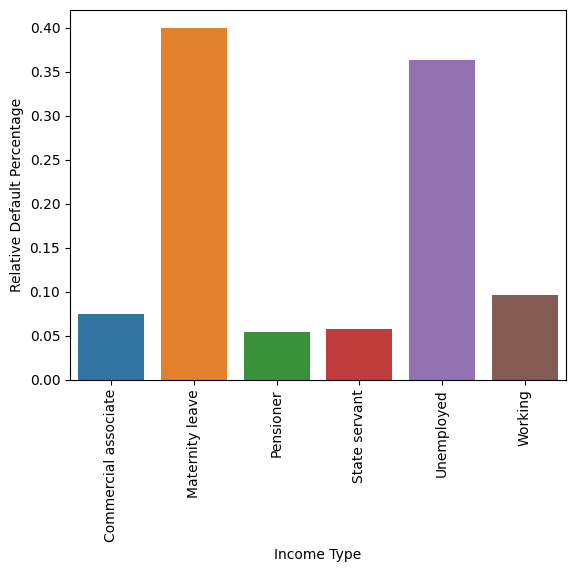

In [31]:
# Relative default 
income_df = app.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts().reset_index(name='count')
total_counts = income_df.groupby('NAME_INCOME_TYPE')['count'].sum().reset_index(name='total_count')
income_df = income_df.merge(total_counts, on='NAME_INCOME_TYPE')
income_df_tgt_1 = income_df[income_df['TARGET'] == 1]
income_df_tgt_1['Relative_Default_PCT'] = income_df_tgt_1['count'] / income_df_tgt_1['total_count']

# Bar plot of income type by relative default
sns.barplot(data=income_df_tgt_1, x='NAME_INCOME_TYPE', y='Relative_Default_PCT')
plt.xlabel('Income Type')
plt.ylabel('Relative Default Percentage')
plt.xticks(rotation=90)
plt.show()

#### NAME_EDUCATION_TYPE

- A Significant share of loans taken by applicants with secondary/secondary special education (\~71%), followed by higher education (\~24%)
- Although applicants with lower secondary education represent a small share, they exhibit the highest relative default rate, exceeding 10%
- Applicants with higher education and academic degrees appear more promising. They can be targeted for new loans in the future due to their favorable repayment records.

Certainly, the trend demonstrates a positive correlation between higher education levels and the potential for successful loan repayment.

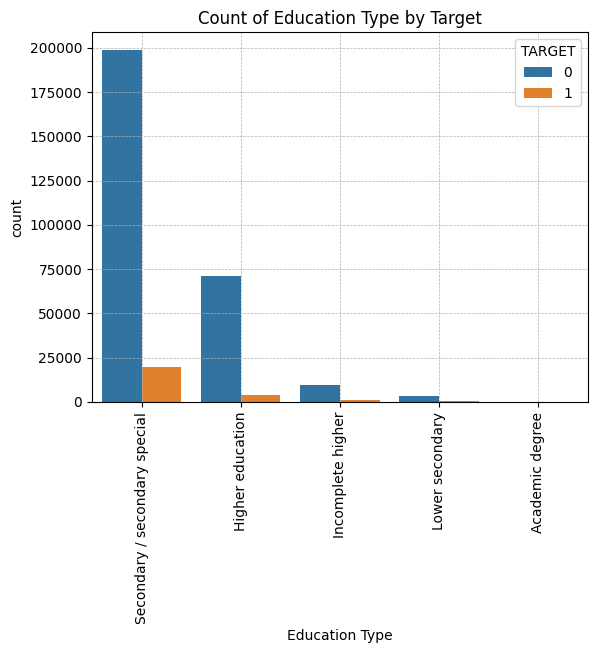

In [32]:
# Count of Education type by Target
sns.countplot(data=app, x='NAME_EDUCATION_TYPE', hue='TARGET')
plt.title('Count of Education Type by Target')
plt.xlabel('Education Type')
plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/tmp/ipykernel_24/81246180.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_df_tgt_1['Relative_Default_PCT'] = edu_df_tgt_1['count'] / edu_df_tgt_1['total_count']


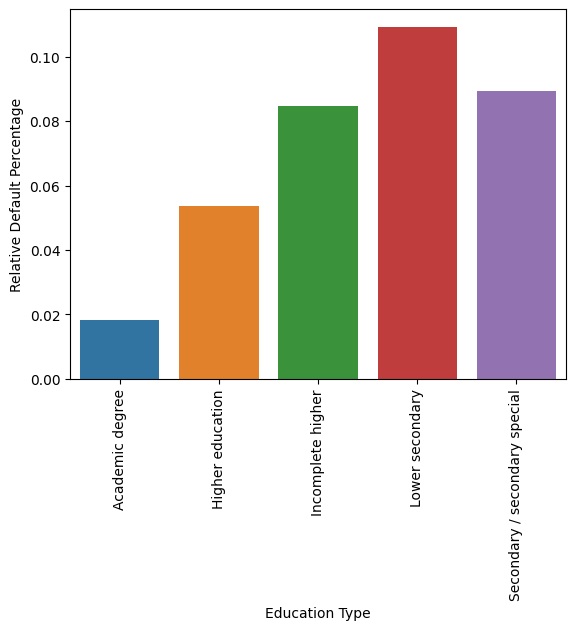

In [33]:
# Relative default 
edu_df = app.groupby('NAME_EDUCATION_TYPE')['TARGET'].value_counts().reset_index(name='count')
total_counts = edu_df.groupby('NAME_EDUCATION_TYPE')['count'].sum().reset_index(name='total_count')
edu_df = edu_df.merge(total_counts, on='NAME_EDUCATION_TYPE')
edu_df_tgt_1 = edu_df[edu_df['TARGET'] == 1]
edu_df_tgt_1['Relative_Default_PCT'] = edu_df_tgt_1['count'] / edu_df_tgt_1['total_count']

# Bar plot of education type by relative default
sns.barplot(data=edu_df_tgt_1, x='NAME_EDUCATION_TYPE', y='Relative_Default_PCT')
plt.xlabel('Education Type')
plt.ylabel('Relative Default Percentage')
plt.xticks(rotation=90)
plt.show()

#### NAME_FAMILY_STATUS

- The majority of loan applicants are married (64%), followed by those who are single or in a civil marriage
- Applicants in civil marriages and those who are single, although they represent a smaller share of the total, exhibit the highest default rates, approaching 10%.
- Married applicants, while not the safest, show a relatively lower default rate compared to other categories, except for widows
- Widows have the lowest relative default rate making them the safest target group for future loans

We can conclude that Widows, with the lowest default rates, and married individuals, with comparatively better repayment records, emerge as safer and more promising target groups for future lending strategies

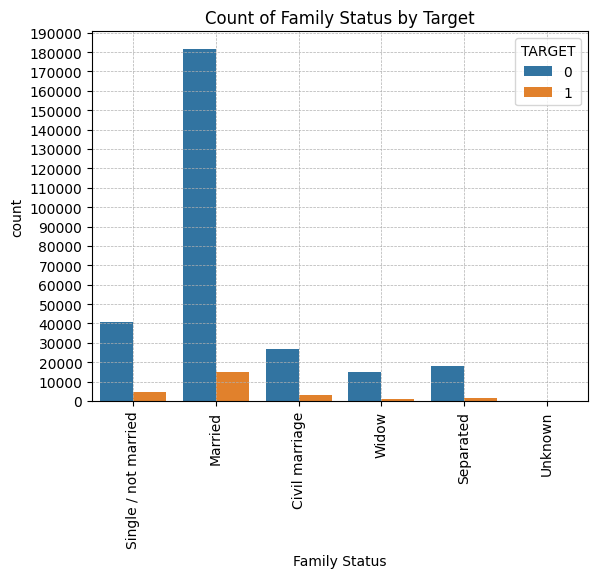

In [34]:
# Count of family status by Target
sns.countplot(data=app, x='NAME_FAMILY_STATUS', hue='TARGET')
plt.title('Count of Family Status by Target')
plt.xlabel('Family Status')
plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(np.arange(0, 200000, 10000))
plt.show()

/tmp/ipykernel_24/3175056402.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_df_tgt_1['Relative_Default_PCT'] = family_df_tgt_1['count'] / family_df_tgt_1['total_count']


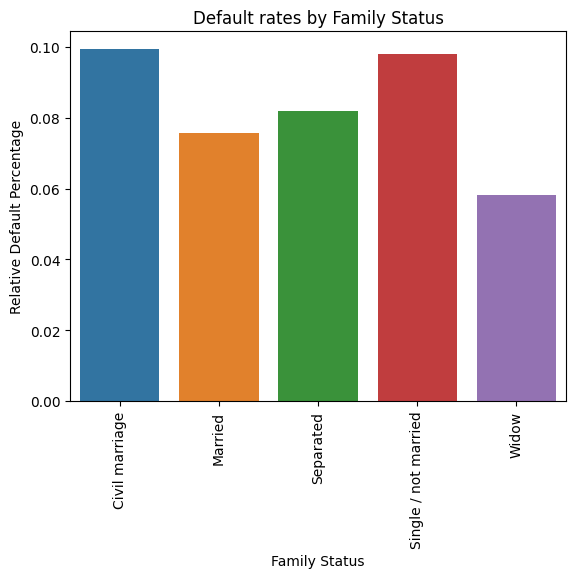

In [35]:
# Relative default 
family_df = app.groupby('NAME_FAMILY_STATUS')['TARGET'].value_counts().reset_index(name='count')
total_counts = family_df.groupby('NAME_FAMILY_STATUS')['count'].sum().reset_index(name='total_count')
family_df = family_df.merge(total_counts, on='NAME_FAMILY_STATUS')
family_df_tgt_1 = family_df[family_df['TARGET'] == 1]
family_df_tgt_1['Relative_Default_PCT'] = family_df_tgt_1['count'] / family_df_tgt_1['total_count']

# Bar plot of family status by relative default
sns.barplot(data=family_df_tgt_1, x='NAME_FAMILY_STATUS', y='Relative_Default_PCT')
plt.xlabel('Family Status')
plt.ylabel('Relative Default Percentage')
plt.title('Default rates by Family Status')
plt.xticks(rotation=90)
plt.show()

#### NAME_HOUSING_TYPE

- Nearly 89% of applicants own a house or apartment, followed by those living with parents (5%), in municipal apartments (4%), and in rented apartments (1.2%).
- Applicants residing in rented apartments and those living with parents are more prone to default.
- Among consumer clients, those owning houses/apartments represent the safest category. Their significant presence in the business facilitates targeted outreach with minimal resource allocation
- Commercial clients using office apartments constitute a small share of the total. Despite their lower representation, they exhibit the lowest default rates, suggesting a promising group for future emphasis and targeted lending strategies

Focusing on commercial clients could significantly enhance future lending strategies. These clients can benefit from more affordable loans and flexible repayment structures. Given the often long-standing relationships between these clients and the bank, this approach can secure a steady revenue stream.

Moreover, by providing tailored financial products and services, the bank can strengthen these relationships further, fostering loyalty and trust. This strategy not only supports the financial stability of commercial clients but also positions the bank as a reliable partner in their growth and success.


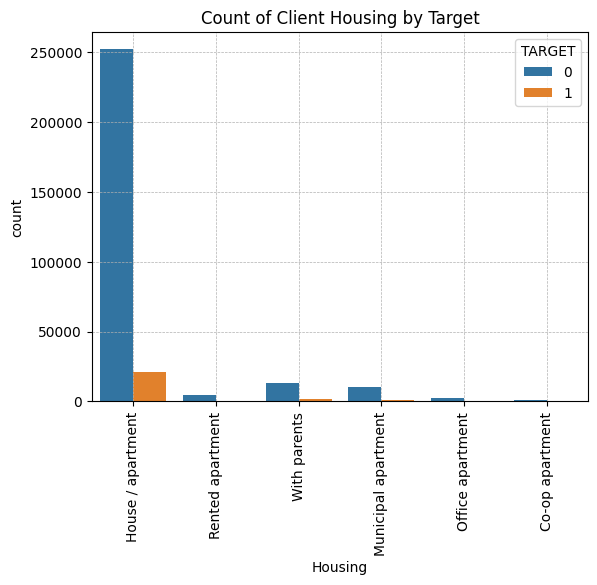

In [36]:
# Count of Client Housing by Target
sns.countplot(data=app, x='NAME_HOUSING_TYPE', hue='TARGET')
plt.title('Count of Client Housing by Target')
plt.xlabel('Housing')
plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/tmp/ipykernel_24/502852843.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df_tgt_1['Relative_Default_PCT'] = house_df_tgt_1['count'] / house_df_tgt_1['total_count']


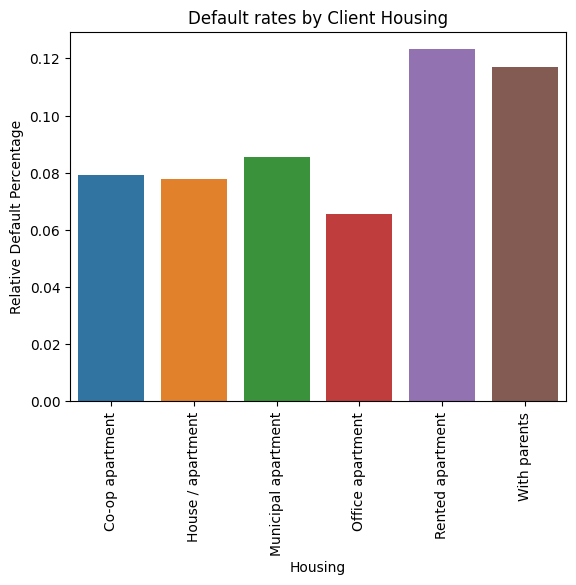

In [37]:
# Relative default 
house_df = app.groupby('NAME_HOUSING_TYPE')['TARGET'].value_counts().reset_index(name='count')
total_counts = house_df.groupby('NAME_HOUSING_TYPE')['count'].sum().reset_index(name='total_count')
house_df = house_df.merge(total_counts, on='NAME_HOUSING_TYPE')
house_df_tgt_1 = house_df[house_df['TARGET'] == 1]
house_df_tgt_1['Relative_Default_PCT'] = house_df_tgt_1['count'] / house_df_tgt_1['total_count']

# Bar plot of client housing by relative default
sns.barplot(data=house_df_tgt_1, x='NAME_HOUSING_TYPE', y='Relative_Default_PCT')
plt.xlabel('Housing')
plt.ylabel('Relative Default Percentage')
plt.title('Default rates by Client Housing')
plt.xticks(rotation=90)
plt.show()

#### OCCUPATION_TYPE

- Nearly 50% of the applicants are labourers, followed by sales staff (10%) and core staff (9%).
- Low-Skill Labourers despite constituting less than 1% of the applicants, this group is more likely to default
- Other occupations, except accountants, show default rates ranging from 6.5% to 11%
- IT Staff, HR Staff, Core Staff, Managers, High skill tech staff - these groups are less likely to default, presumably due to their higher incomes compared to other occupations
- Accountants stands out as the safest target group, with the lowest default rates, constituting just 3% of total loans

The data suggests that occupations associated with higher incomes tend to have lower default rates. Among these, accountants emerge as a particularly promising group. Their strong track record of timely repayment makes them an ideal target for future loan offerings.

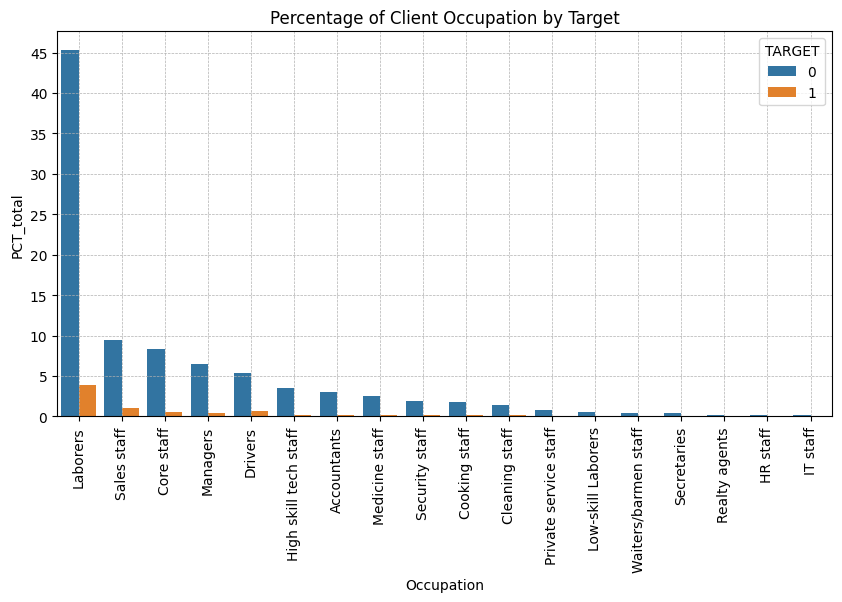

In [38]:
# creating a new dataframe with total occupation count
occupation_count_df = app.groupby('OCCUPATION_TYPE')['TARGET'].value_counts().reset_index(name='count')
total_count_df = occupation_count_df.groupby('OCCUPATION_TYPE')['count'].sum().reset_index(name='total_count')
occupation_count_df = occupation_count_df.merge(total_count_df, on='OCCUPATION_TYPE')
occupation_count_df = occupation_count_df.sort_values(by='total_count', ascending=False)
occupation_count_df['PCT_total'] = occupation_count_df['count'] / occupation_count_df['count'].sum() * 100

# Percentage of Client Occupation by Target
plt.figure(figsize=(10,5))
sns.barplot(data=occupation_count_df, x='OCCUPATION_TYPE', y='PCT_total', hue='TARGET')
plt.title('Percentage of Client Occupation by Target')
plt.xlabel('Occupation')
plt.yticks(np.arange(0, 50, 5))
plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/tmp/ipykernel_24/2841719515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  occupation_count_df_tgt_1['Relative_Default_PCT'] = occupation_count_df_tgt_1['count'] / occupation_count_df_tgt_1['total_count'] * 100


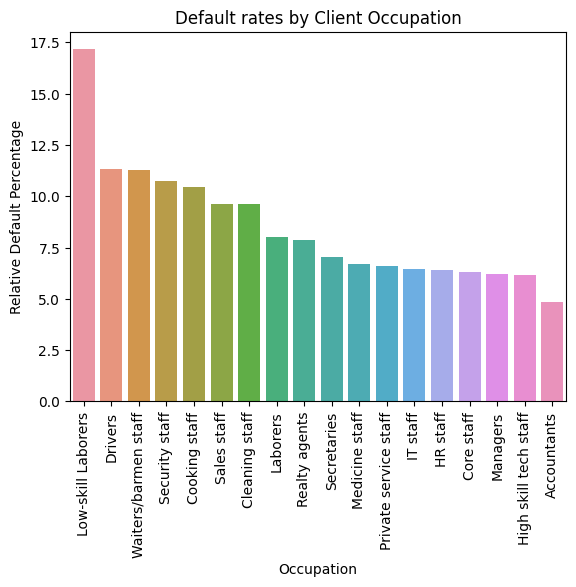

In [39]:
# Relative default 
occupation_count_df_tgt_1 = occupation_count_df[occupation_count_df['TARGET'] == 1]
occupation_count_df_tgt_1['Relative_Default_PCT'] = occupation_count_df_tgt_1['count'] / occupation_count_df_tgt_1['total_count'] * 100
occupation_count_df_tgt_1 = occupation_count_df_tgt_1.sort_values(by='Relative_Default_PCT', ascending=False)

# Bar plot of client housing by relative default
sns.barplot(data=occupation_count_df_tgt_1, x='OCCUPATION_TYPE', y='Relative_Default_PCT')
plt.xlabel('Occupation')
plt.ylabel('Relative Default Percentage')
plt.title('Default rates by Client Occupation')
plt.xticks(rotation=90)
plt.show()

#### ORGANIZATION_TYPE

- Busniness Entity: Type 3 (20%), XNA (11.5%), Others (5%)
- Transport type 3, Industry Type 3, Industry Type 8,  which are < 1% are serious defaulters
- Trade Type 3 has the least default rate. But not much of its market potential has been tapped

Not much information was obtained from this column. A more effective approach would be to classify these categories into subcategories such as Industry, Transport, Business, Medicine, etc. A sectoral analysis could provide more meaningful trends within each sector, offering better guidance for strategic decision-making.

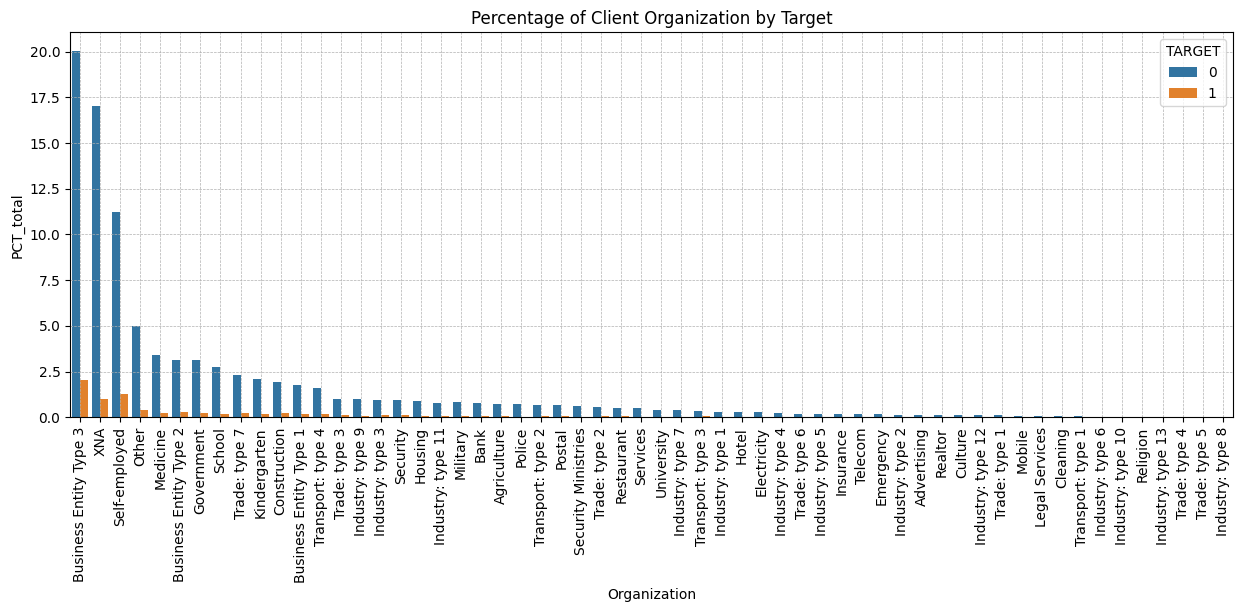

In [40]:
# creating a new dataframe with total organization count
organization_count_df = app.groupby('ORGANIZATION_TYPE')['TARGET'].value_counts().reset_index(name='count')
total_count_df = organization_count_df.groupby('ORGANIZATION_TYPE')['count'].sum().reset_index(name='total_count')
organization_count_df = organization_count_df.merge(total_count_df, on='ORGANIZATION_TYPE')
organization_count_df = organization_count_df.sort_values(by='total_count', ascending=False)
organization_count_df['PCT_total'] = organization_count_df['count'] / organization_count_df['count'].sum() * 100

# Percentage of Organization type by Target
plt.figure(figsize=(15,5))
sns.barplot(data=organization_count_df, x='ORGANIZATION_TYPE', y='PCT_total', hue='TARGET')
plt.title('Percentage of Client Organization by Target')
plt.xlabel('Organization')
#plt.yticks(np.arange(0, 50, 5))
plt.xticks(rotation=90)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/tmp/ipykernel_24/4045455276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organization_count_df_tgt_1['Relative_Default_PCT'] = organization_count_df_tgt_1['count'] / organization_count_df_tgt_1['total_count'] * 100


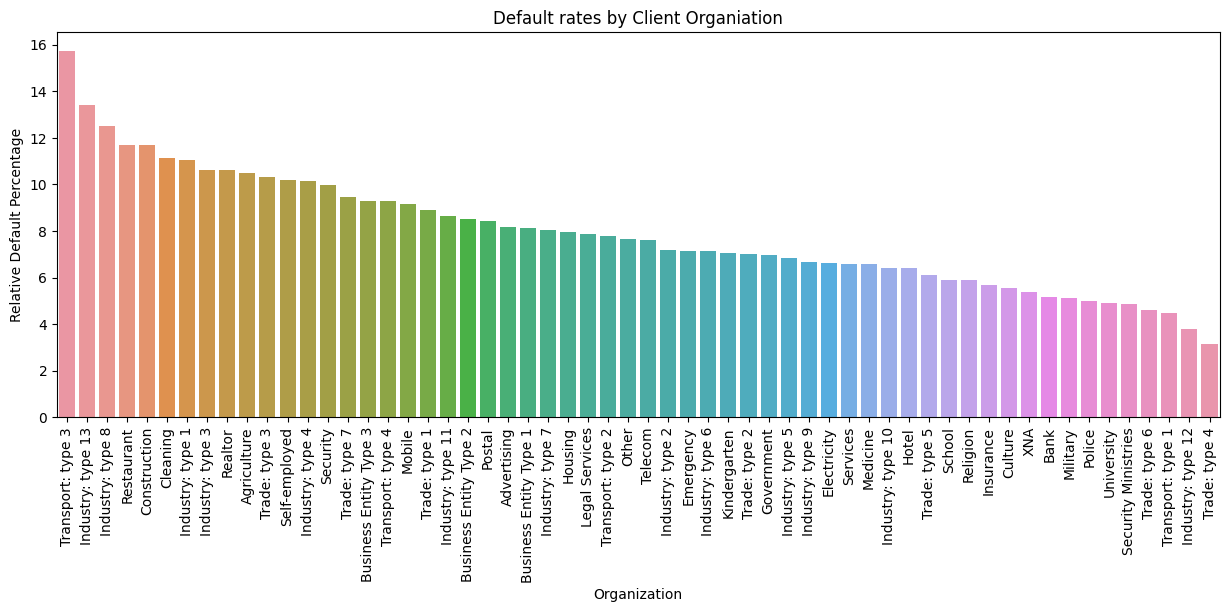

In [41]:
# Relative default 
organization_count_df_tgt_1 = organization_count_df[organization_count_df['TARGET'] == 1]
organization_count_df_tgt_1['Relative_Default_PCT'] = organization_count_df_tgt_1['count'] / organization_count_df_tgt_1['total_count'] * 100
organization_count_df_tgt_1 = organization_count_df_tgt_1.sort_values(by='Relative_Default_PCT', ascending=False)

# Bar plot of client housing by relative default
plt.figure(figsize=(15,5))
sns.barplot(data=organization_count_df_tgt_1, x='ORGANIZATION_TYPE', y='Relative_Default_PCT')
plt.xlabel('Organization')
plt.ylabel('Relative Default Percentage')
plt.title('Default rates by Client Organiation')
plt.xticks(rotation=90)
plt.show()

### 4.2 Analysis on Numerical Variables

Upon inspecting the dataset, it is evident that there is a significant class imbalance, with repayers comprising 92% of the data and defaulters making up only 8%. This imbalance can potentially skew the analysis.

To conduct a more meaningful and robust analysis, we should address this imbalance. One effective approach is to split the dataframe into two separate subsets: defaulters and non-defaulters. This stratification will enable us to analyze each group independently, understand their unique characteristics, and develop strategies tailored to each segment.

In [42]:
# Selecting numerical variables
num_var = app.select_dtypes(include=['float64', 'int64']).columns
num_data = app[num_var]

# Separating into defaulters and non-defaulters
defaulters = num_data[num_data['TARGET'] == 1].drop(columns=['TARGET'])
repayers = num_data[num_data['TARGET'] == 0].drop(columns=['TARGET'])

#### Correlation between Numerical Variables

In [43]:
defaulters_corr = defaulters.corr()
defaulters_corr = defaulters_corr.where(np.triu(np.ones(defaulters_corr.shape), k=1).astype(bool))
defaulters_corr_unstck = defaulters_corr.unstack().reset_index().rename(columns={'level_0':'var1', 'level_1':'var2', 0:'corr'})
defaulters_corr_unstck['corr'] = defaulters_corr_unstck['corr'].transform(lambda x: abs(x))
defaulters_corr_unstck.dropna(subset='corr').sort_values(by='corr', ascending=False).head(10)

,var1,var2,corr
757,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
163,AMT_GOODS_PRICE,AMT_CREDIT,0.982783
428,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
353,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
790,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994
560,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
659,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
164,AMT_GOODS_PRICE,AMT_ANNUITY,0.752295
131,AMT_ANNUITY,AMT_CREDIT,0.752195
263,DAYS_EMPLOYED,DAYS_BIRTH,0.582185


In [44]:
repayers_corr = repayers.corr()
repayers_corr = repayers_corr.where(np.triu(np.ones(repayers_corr.shape), k=1).astype(bool))
repayers_corr_unstck = repayers_corr.unstack().reset_index().rename(columns={'level_0':'var1', 'level_1':'var2', 0:'corr'})
repayers_corr_unstck['corr'] = repayers_corr_unstck['corr'].transform(lambda x: abs(x))
repayers_corr_unstck.dropna(subset='corr').sort_values(by='corr', ascending=False).head(10)

,var1,var2,corr
757,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
163,AMT_GOODS_PRICE,AMT_CREDIT,0.987022
428,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
353,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
560,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
790,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859332
659,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
164,AMT_GOODS_PRICE,AMT_ANNUITY,0.776421
131,AMT_ANNUITY,AMT_CREDIT,0.771297
263,DAYS_EMPLOYED,DAYS_BIRTH,0.626114


### 4.3 Univariate Analysis on Numerical Variables

#### AMT_CREDIT

- The **median** credit amount for both defaulters and non-defaulters is quite similar, around 0.5 million. This indicates that the ***central tendency*** of credit amount is comparable for both groups
- The **IQR**, representing the middle 50% of the data is also similar for both categories. This suggests that the ***spread*** of credit amounts within the middle range is comparable for both groups
- Both categories exhibit a significant number of **outliers**, with credit amounts extending up to approximately 4.05 million.The presence of many outliers indicates that there are individuals in both categories with exceptionally high credit amounts
- Smaller range of lower **whisker** indicates the lower range of credit values is quite small. While larger range of upper one suggest a higher spread due to the presence of outliers 

The overall distribution of credit amounts is quite similar between those who repaid their loans on time and those who defaulted. This suggests that credit amount alone may not be a strong differentiator between these two groups.

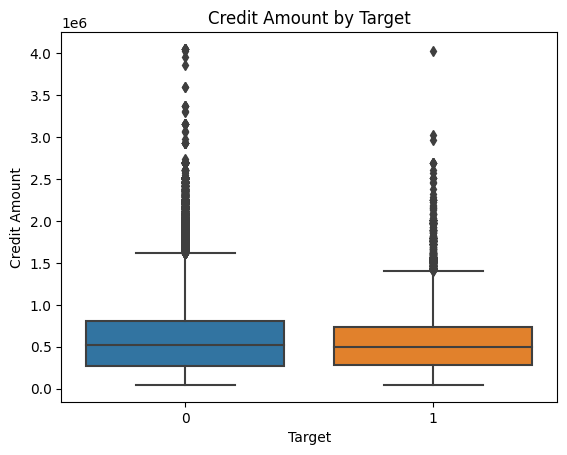

In [45]:
# Box plot
sns.boxplot(data=num_data, x='TARGET', y='AMT_CREDIT')
plt.title('Credit Amount by Target')
plt.xlabel('Target')
plt.ylabel('Credit Amount')
plt.show()

#### AMT_INCOME_TOTAL

- The median income is comparable for both groups and approximates to 150000
- Most clients have income in the range 0.1 mil - 0.25 mil

The comparable medians, IQRs, and spread of income for both groups indicate that total income alone may not be a strong predictor of loan repayment behavior.

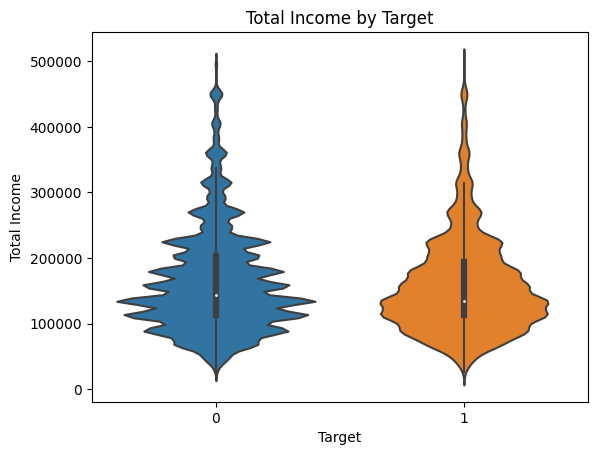

In [64]:
# In prev analysis I found that there are large outliers. By dropping them
# it becomes easy to visualize the data on a much smaller scale

num_data_outl_rmd = num_data[num_data.AMT_INCOME_TOTAL < 500000]

# Box plot
sns.violinplot(data=num_data_outl_rmd, x='TARGET', y='AMT_INCOME_TOTAL')
plt.title('Total Income by Target')
plt.xlabel('Target')
plt.ylabel('Total Income')
plt.show()

#### AMT_ANNUITY

- Median annuity amount is around 25000
- The spread of outliers in those who repayed on time is larger compared to defaulters
- The median, IQR, whiskers are all comparable for the two categories

From the analysis it is clear that annuity alone does not explain the variance in the target feature well


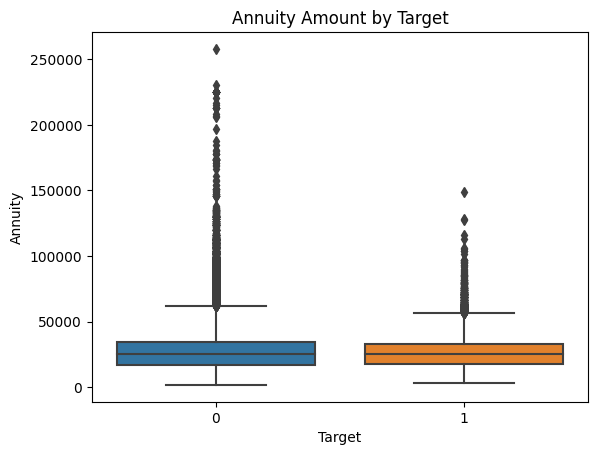

In [47]:
# Box plot
sns.boxplot(data=num_data, x='TARGET', y='AMT_ANNUITY')
plt.title('Annuity Amount by Target')
plt.xlabel('Target')
plt.ylabel('Annuity')
plt.show()

#### AMT_GOODS_PRICE

- Median goods price is nearly 450000 for both categories

The median, IQR, whiskers are all comparable for defaulters and non defaulters. However the range of outliers is comparitively larger in non-defaulter. This may be due to the imbalanced nature of the dataset

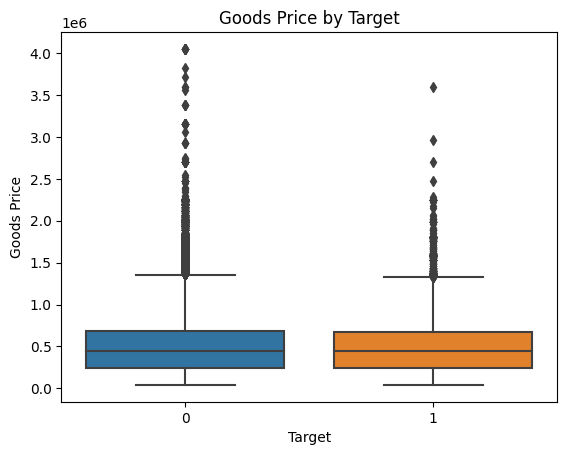

In [48]:
# Box plot
sns.boxplot(data=num_data, x='TARGET', y='AMT_GOODS_PRICE')
plt.title('Goods Price by Target')
plt.xlabel('Target')
plt.ylabel('Goods Price')
plt.show()

### 4.4 Bivariate Analysis

#### AMT_CREDIT and AMT_GOODS_PRICE

- Both the features are highly positively correlated
- Most defaulters have credit amounts less than 1.5 mil, while for non-defaulters, the credit amounts are typically under 2.5 mil

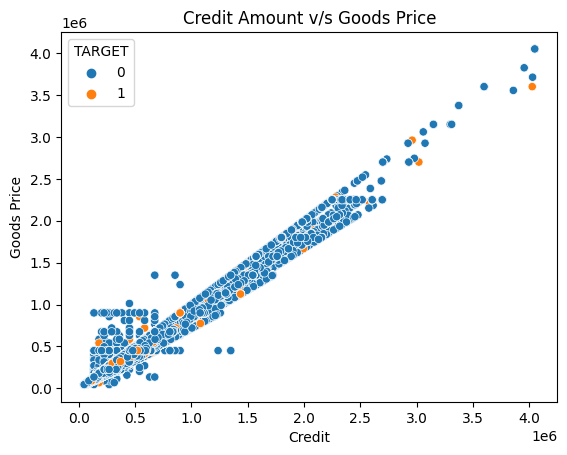

In [49]:
# Scatter plot
sns.scatterplot(data=num_data, x='AMT_CREDIT', y='AMT_GOODS_PRICE', hue='TARGET')
plt.xlabel('Credit')
plt.ylabel('Goods Price')
plt.title('Credit Amount v/s Goods Price')
plt.show()

#### AMT_CREDIT v/s AMT_INCOME_TOTAL

- There is no clear relationship between total income and credit values.
- Most defaults occur for loan amounts under 1,500,000.
- It appears safer to target customers with a total income greater than 150,000 and credit amounts between 2,000,000 and 2,500,000.

While a direct relationship between total income and credit values cannot be clearly established, focusing on customers with higher total incomes and specific credit ranges may help mitigate default risks and improve loan portfolio quality.

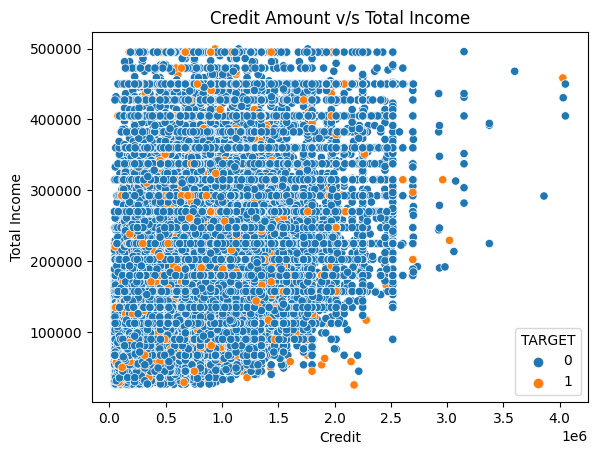

In [50]:
# Scatter plot
sns.scatterplot(data=num_data_outl_rmd , x='AMT_CREDIT', y='AMT_INCOME_TOTAL', hue='TARGET')
plt.xlabel('Credit')
plt.ylabel('Total Income')
plt.title('Credit Amount v/s Total Income')
plt.show()

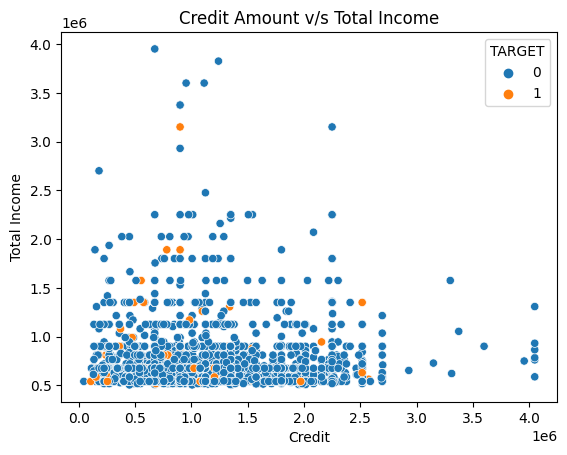

In [51]:
# Taking outliers
num_data_outl = num_data[(num_data.AMT_INCOME_TOTAL > 500000) & (num_data.AMT_INCOME_TOTAL < 4000000) ]

# Scatter plot
sns.scatterplot(data=num_data_outl , x='AMT_CREDIT', y='AMT_INCOME_TOTAL', hue='TARGET')
plt.xlabel('Credit')
plt.ylabel('Total Income')
plt.title('Credit Amount v/s Total Income')
plt.show()

#### AMT_CREDIT v/s CNT_CHILDREN

- The majority of applicants have no children (70%), followed by those with one child (20%) and two children (9%)
- The variability in credit values for the top three groups (0, 1, and 2 children) is minimal, with average credit values around 600,000
- There is negligible difference in loan repayment or default rates among the top three groups

So we can conclude the number of children does not significantly impact the variability in credit values or the likelihood of loan repayment versus default for the majority of applicants

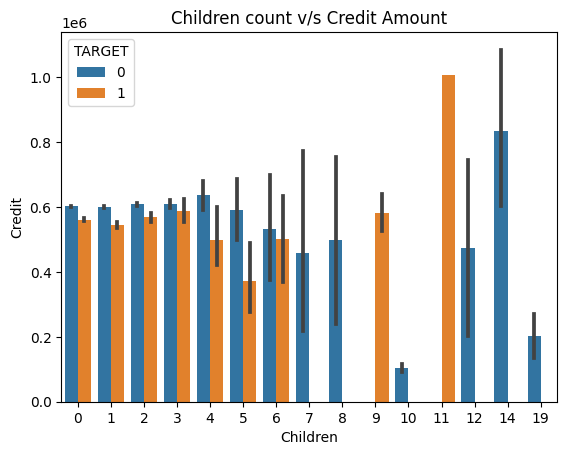

In [52]:
# Scatter plot
sns.barplot(data=num_data , x='CNT_CHILDREN', y='AMT_CREDIT', hue='TARGET')
plt.xlabel('Children')
plt.ylabel('Credit')
plt.title('Children count v/s Credit Amount')
plt.show()